<a href="https://colab.research.google.com/github/kishanmadhav/mlrepo/blob/main/MAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
import tensorflow as tf
import os

from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

from tensorflow.keras.utils import img_to_array,load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
folder_dir = "/content/drive/MyDrive/Project_research/sugarcane/Images/train_set"
folder_dir2 = "/content/drive/MyDrive/Project_research/sugarcane/Images/Primary_Dataset"

train_datagen=ImageDataGenerator(zoom_range = 0.5,shear_range=0.5,rescale=1/255 ,
                                 horizontal_flip=True,
                                 preprocessing_function= preprocess_input)
val_datagen=ImageDataGenerator( preprocessing_function= preprocess_input )


In [ ]:
train = train_datagen.flow_from_directory(directory=folder_dir,
                                          target_size=(128,128),
                                            batch_size=32)
val=val_datagen.flow_from_directory(directory=folder_dir2,
                                    target_size=(128,128),
                                    batch_size=32)

Found 1177 images belonging to 2 classes.
Found 864 images belonging to 2 classes.


In [ ]:
t_img , label=train.next()

In [ ]:
t_img.shape

(32, 128, 128, 3)

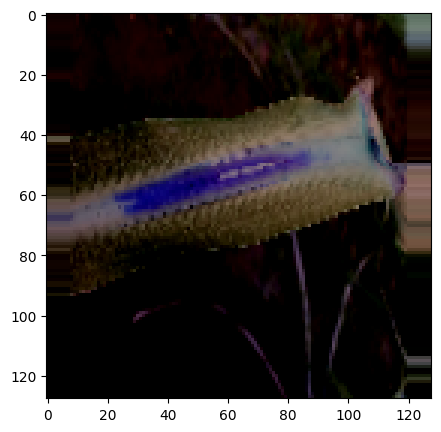

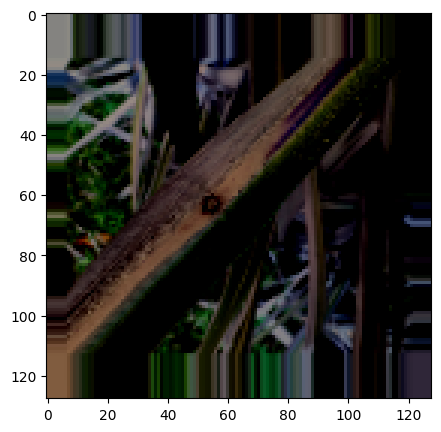

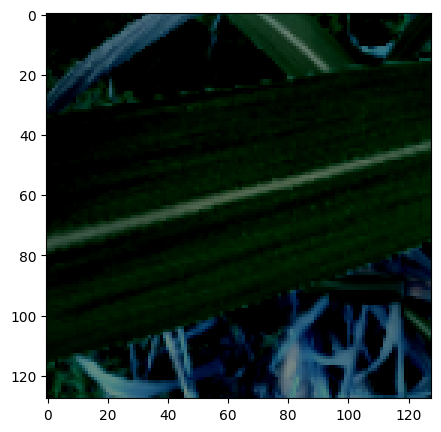

In [ ]:
def plotImage(img_arr,label):
    for im , l in zip(img_arr,label):
        plt.figure(figsize=(5,5))
        (plt.imshow(im))

        (plt.show())
plotImage(t_img[:3],label[:3])


MODEL


In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model=VGG19(input_shape=(128,128,3),include_top=False)


80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable=False


In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
import tensorflow.keras as kera
from tensorflow.keras import layers
from tensorflow.keras import regularizers
x=Flatten()(base_model.output)
x = layers.Dense(units=128, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)

x=Dense(units=2,activation='softmax')(x)

#  creating our model
model=Model(base_model.input,x)

In [ ]:
optimiser = keras.optimizers.Adam(learning_rate=0.00012)
model.compile(optimizer=optimiser,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

Early stopping and Model check point

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
#earlystopping
es=EarlyStopping(monitor='accuracy',min_delta=0.01,patience=8,verbose=1)
es1=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=2,verbose=1)

#model checkpoint
mc=ModelCheckpoint(filepath="best_model.h5",monitor='accuracy',
                   min_delta=0.01,
                   patience=8,
                   verbose=6,
                   save_best_only=True)
mc1=ModelCheckpoint(filepath="best_model2.h5",monitor='val_accuracy',
                   min_delta=0.01,
                   patience=10,
                   verbose=6,
                   save_best_only=True)
cb=[es,mc,es1,mc1]

In [ ]:
# t=model.fit(X_train_scaled, y_train, epochs=30)


In [ ]:
his=model.fit_generator(train, steps_per_epoch=15, epochs=15, verbose=1,

                    callbacks=cb,
                    validation_data=val,
                    validation_steps=15)

<ipython-input-16-5f7cfb0bdc4b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(train, steps_per_epoch=15, epochs=15, verbose=1,


Epoch 1/15
15/15 [==============================] - ETA: 0s - loss: 0.7569 - accuracy: 0.6490 
Epoch 1: accuracy improved from -inf to 0.64905, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: val_accuracy improved from -inf to 0.66042, saving model to best_model2.h5
15/15 [==============================] - 520s 36s/step - loss: 0.7569 - accuracy: 0.6490 - val_loss: 0.6092 - val_accuracy: 0.6604
Epoch 2/15
15/15 [==============================] - ETA: 0s - loss: 0.5160 - accuracy: 0.7708
Epoch 2: accuracy improved from 0.64905 to 0.77083, saving model to best_model.h5

Epoch 2: val_accuracy did not improve from 0.66042
15/15 [==============================] - 296s 21s/step - loss: 0.5160 - accuracy: 0.7708 - val_loss: 0.5919 - val_accuracy: 0.6604
Epoch 3/15
15/15 [==============================] - ETA: 0s - loss: 0.4250 - accuracy: 0.8458
Epoch 3: accuracy improved from 0.77083 to 0.84583, saving model to best_model.h5

Epoch 3: val_accuracy improved from 0.66042 to 0.72917, saving model to best_model2.h5
15/15 [==============================] - 209s 14s/step - loss: 0.4250 - accuracy: 0.8458 - val_loss: 0.5161 - val_accuracy: 0.7292
Epoch 4/15
15/15 [============

In [ ]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
print(h['loss'])
print(h['accuracy'])
print(h['val_loss'])
print(h['val_accuracy'])

[0.7568710446357727, 0.5159518718719482, 0.4250113070011139, 0.35456982254981995, 0.3024981915950775, 0.32235822081565857, 0.22237052023410797]
[0.6490486264228821, 0.7708333134651184, 0.8458333611488342, 0.8498942852020264, 0.8498942852020264, 0.8562368154525757, 0.8999999761581421]
[0.6092145442962646, 0.5918666124343872, 0.5161068439483643, 0.49861928820610046, 0.430546373128891, 0.5328996181488037, 0.5848588943481445]
[0.6604166626930237, 0.6604166626930237, 0.7291666865348816, 0.7541666626930237, 0.7895833253860474, 0.7437499761581421, 0.7124999761581421]


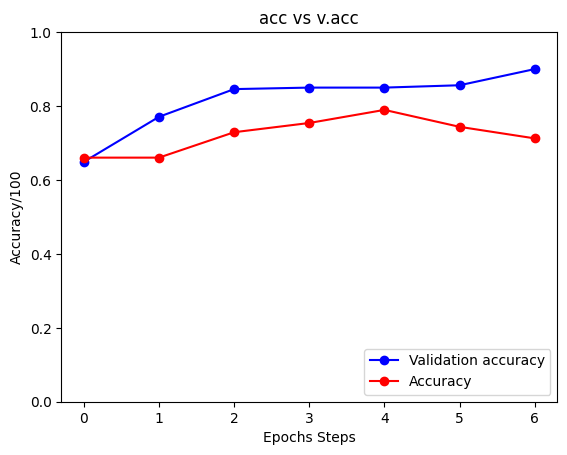

In [ ]:
l1,=plt.plot(h['accuracy'],c="blue",marker='o')
l2,=plt.plot(h['val_accuracy'],c="red",marker='o')
plt.legend((l1,l2),["Validation accuracy","Accuracy"],loc="lower right")
plt.xlabel('Epochs Steps')
plt.ylabel('Accuracy/100')
plt.title("acc vs v.acc")
plt.ylim(0,1.00)
plt.show()

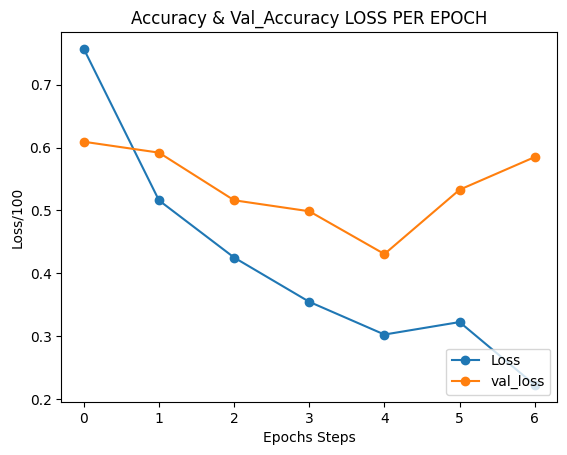

In [ ]:
l1,=plt.plot(h['loss'],marker='o')
l2,=plt.plot(h['val_loss'],marker='o')
plt.legend((l1,l2),["Loss","val_loss"],loc="lower right")
# plt.legend(["LOSS"],loc="lower righ/8t")
plt.xlabel('Epochs Steps')
plt.ylabel('Loss/100')
plt.title("Accuracy & Val_Accuracy LOSS PER EPOCH")
plt.show()

In [ ]:
#loadbest model
from keras.models import load_model
model=load_model("/content/best_model.h5")

In [ ]:
acc=model.evaluate_generator(val)[1]
print(f"The accuracy of your model is = {acc*100}%")

<ipython-input-22-0d8924a1c9da>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc=model.evaluate_generator(val)[1]


The accuracy of your model is = 73.14814925193787%


#TESTING THE DATA

In [ ]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))


In [ ]:
def prediction(path):
  img=load_img(path,target_size=(128,128))
  i=img_to_array(img)
  im=preprocess_input(i)
  # print(im.shape)
  img=np.expand_dims(im,axis=0)
  # print(img.shape)
  pred=np.argmax(model.predict(img))
  # print(pred)
  print(f"The image belongs to {ref[pred]}")

In [ ]:
path="/content/drive/MyDrive/Project_research/sugarcane/Images/test_set/unhealthy/Unhealthy_13.jpg"
prediction(path)

1/1 [==============================] - 1s 1s/step
The image belongs to Unhealthy


In [ ]:
# from sklearn.metrics import confusion_matrix

# from sklearn.linear_model import LogisticRegression

# from sklearn.model_selection import train_test_split


# x_train, x_test, y_train, y_test = train_test_split(train, val, test_size=0.5,stratify=val, random_state=2)

# x_train_prediction=model.predict(x_train)
# model  = LogisticRegression()
# model.fit(x_train,y_train)
# x_train_prediction=model.predict(x_train)

# cm=confusion_matrix(y_test,x_train_prediction)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
import tensorflow as tf
import os

from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

from tensorflow.keras.utils import img_to_array,load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# folders with train dir & val dir
train_dir =  "/content/drive/MyDrive/Project_research/sugarcane/Images/test_set"
test_dir =  "/content/drive/MyDrive/Project_research/sugarcane/Images/train_set"
testing_dir = '/content/drive/MyDrive/Project_research/sugarcane/Images/TESTING_set_for_confusion matrix'
input_shape = (128,128,3)

In [ ]:
testing_datagen = ImageDataGenerator(rescale=1. / 255)
testing_generator = testing_datagen.flow_from_directory(
    test_dir,
target_size=(128,128),
batch_size=32,
shuffle=False,
class_mode='categorical')
train_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
testing_dir,
target_size=(128,128),
batch_size=32,
shuffle=False,
class_mode='categorical')

Found 1177 images belonging to 2 classes.
Found 262 images belonging to 2 classes.


Normalized confusion matrix


<ipython-input-29-52d5db0058ee>:48: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(testing_generator)


Confusion Matrix
[[598   5]
 [305 269]]


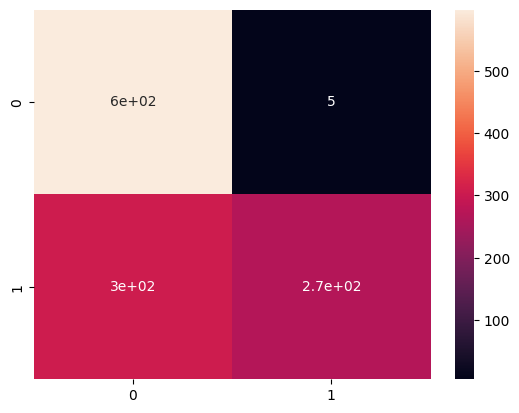

Classification Report
True positive TPs:- 598
False positive FPs:- 5
Flase negatives FNs:- 305
True Negatices TNs:- 269
Accuracy:- 0.7366185216652507
              precision    recall  f1-score   support

     healthy       0.66      0.99      0.79       603
   unhealthy       0.98      0.47      0.63       574

    accuracy                           0.74      1177
   macro avg       0.82      0.73      0.71      1177
weighted avg       0.82      0.74      0.72      1177



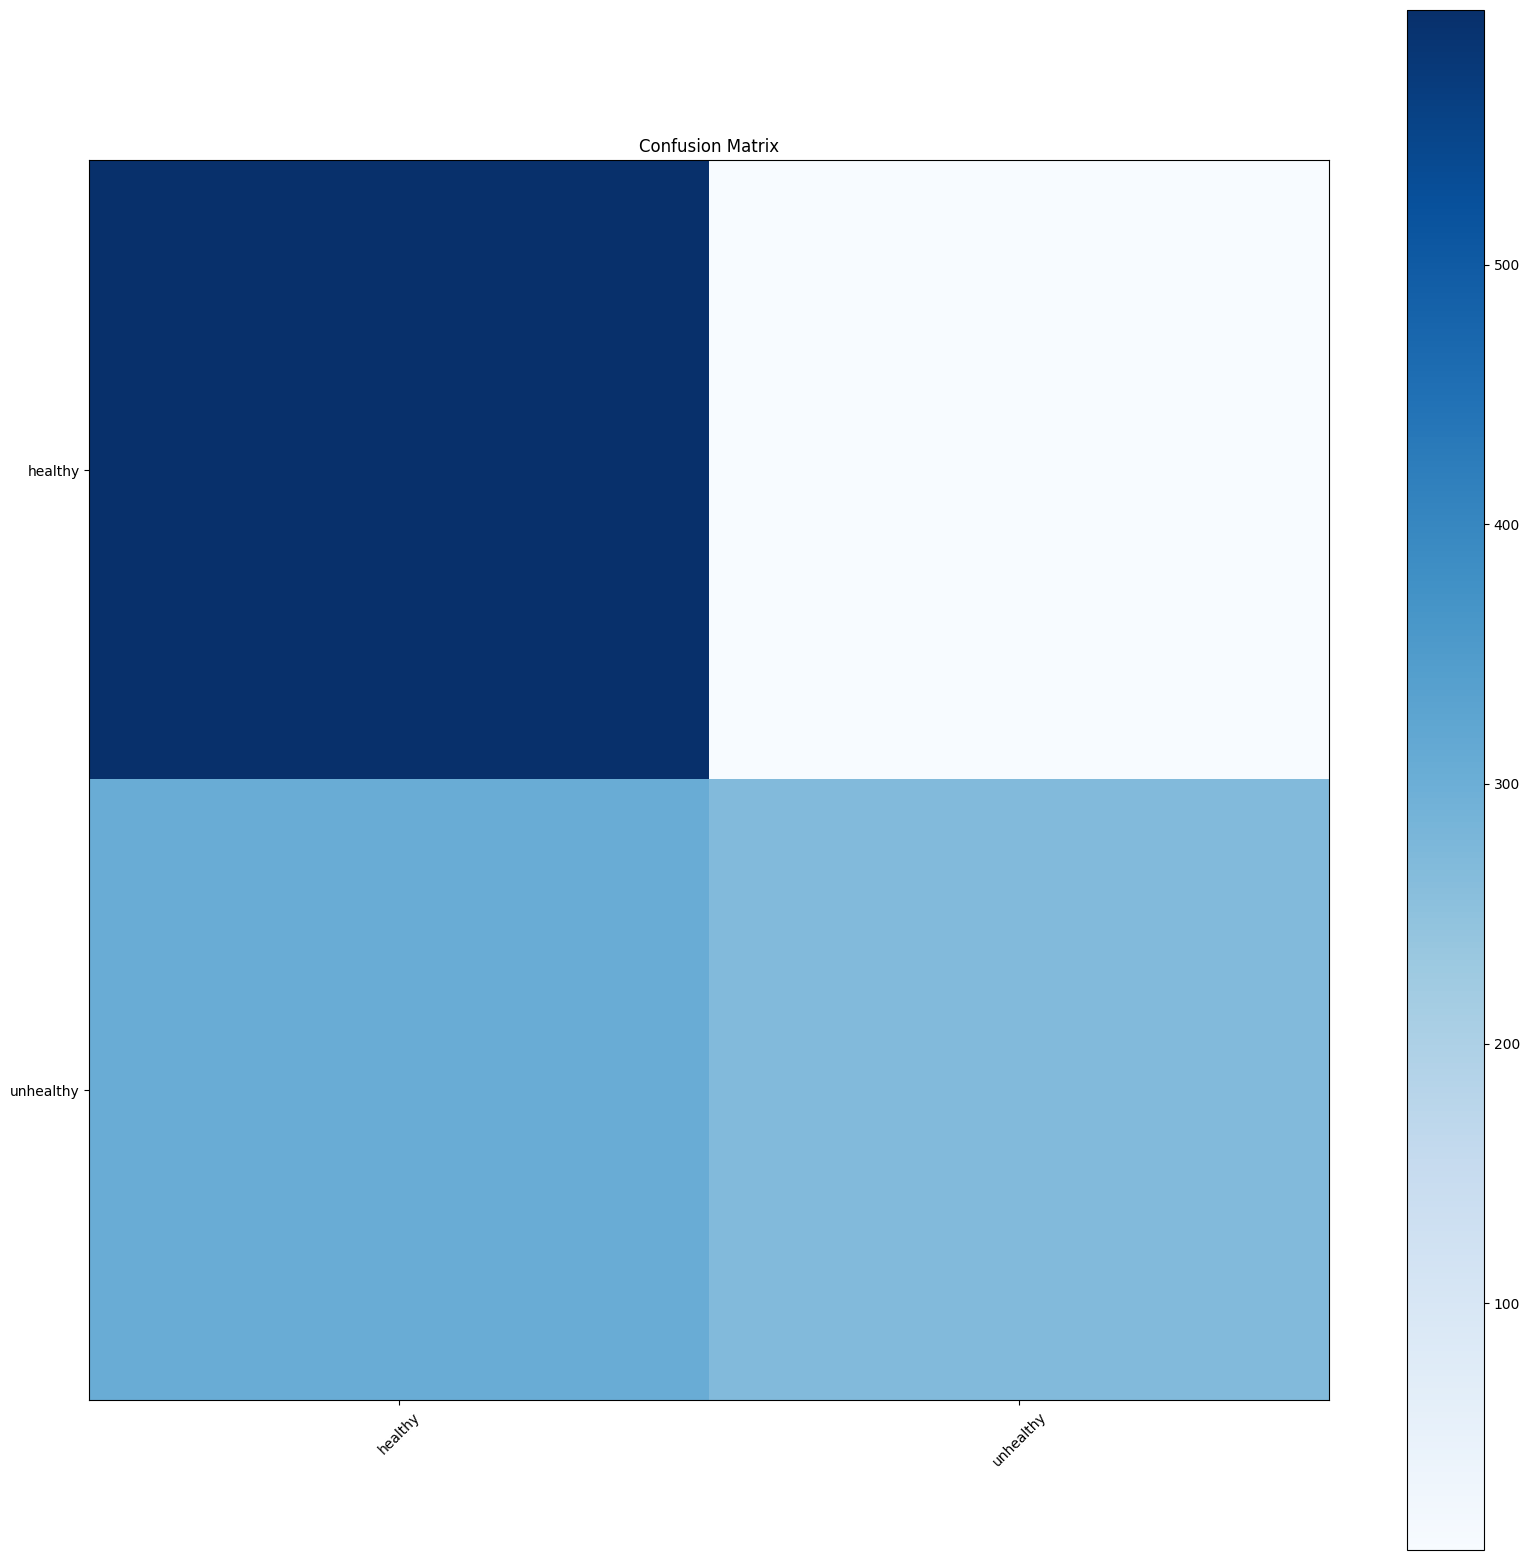

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
import tensorflow as tf
import os

from sklearn.metrics import confusion_matrix as cm
normalize = True
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
if normalize:
        # cm = cm / cm(axis=1)
        # cm = np.round(cm, decimals=2)
        # cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
else:
    print('Confusion matrix, without normalization')
    thresh = (cm.max() / 2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#shuffle=False
target_names = []
train_generator
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(testing_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(testing_generator.classes, y_pred)
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True)
plt.show()
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')


TPs=cm[0][0]
FPs=cm[0][1]
FNs=cm[1][0]
TNs=cm[1][1]
print("True positive TPs:-",cm[0][0])
print("False positive FPs:-",cm[0][1])
print("Flase negatives FNs:-",cm[1][0])
print("True Negatices TNs:-",cm[1][1])


print("Accuracy:-",(TPs+TNs)/(TPs+FPs+FNs+TNs))


print(classification_report(testing_generator.classes, y_pred, target_names=target_names))